In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
ds = load_dataset("beanham/spatial_join_dataset_new")
train=ds['train']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()

## Angle Degrees

In [6]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 1.0104985846862165
Mean: 24.98321825267522
Max: 89.96083885806539
STD: 34.61161979494549


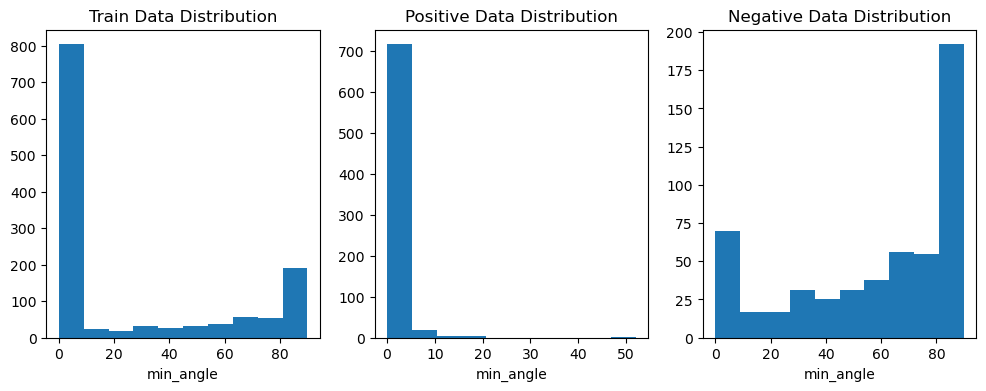

In [7]:
## almost all positive cases have small angles (<10 degrees)
## most negative cases have large angles, with some cases having small angles
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

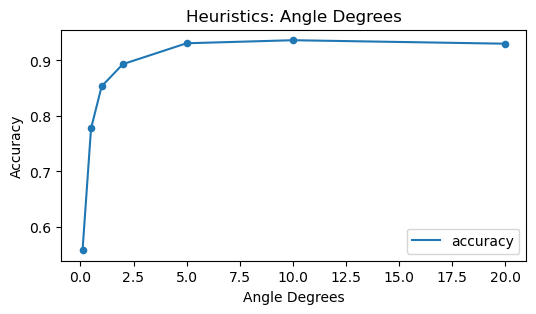

In [8]:
metrics=[0.1,0.5,1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

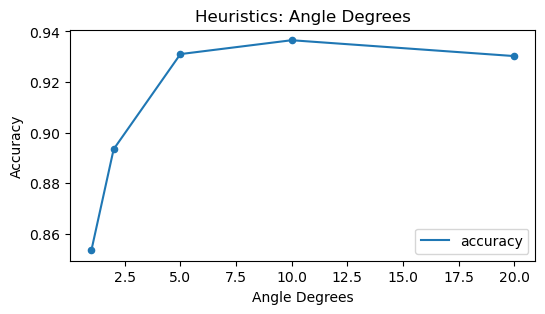

In [9]:
# final degrees: [1,2,5,10,20]
metrics=[1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

---

## Angle Degrees Direct

In [22]:
name='min_angle_direct'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.00016395788722151704
Median: 24.89223444429075
Mean: 38.85372804175314
Max: 89.96083885806539
STD: 35.94582072223851


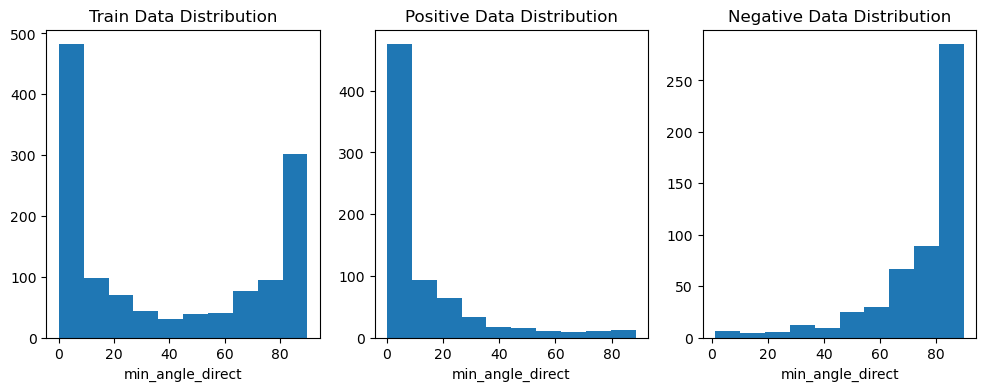

In [23]:
## almost all positive cases have small angles (<10 degrees)
## most negative cases have large angles, with some cases having small angles
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

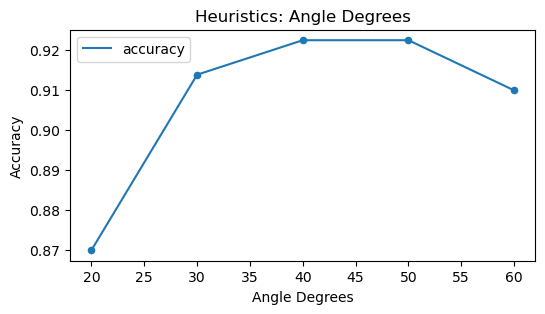

In [32]:
metrics=[20,30,40,50,60]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle_direct'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

---

## Euclidean Distance

In [12]:
name='euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.95530319694431
Mean: 5.549508276982771
Max: 9.97967189435663
STD: 3.6029891762647632


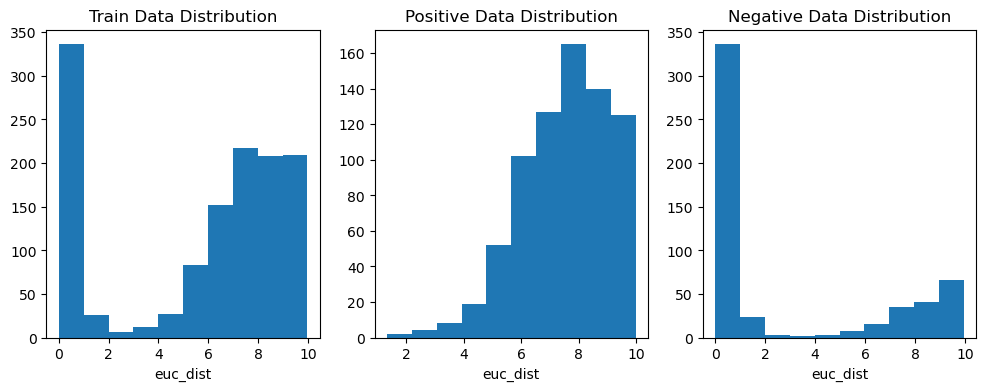

In [13]:
## almost all positive cases have larger distances
## most negative cases have smaller distances, with a few having large distances
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

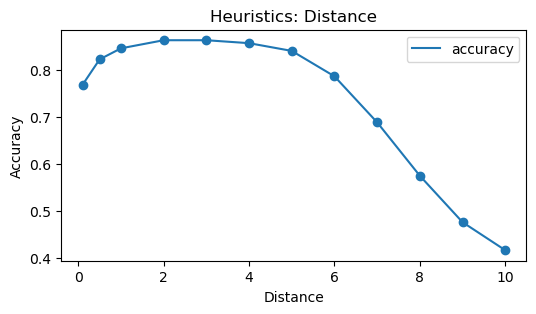

In [14]:
metrics=[0.1,0.5,1,2,3,4,5,6,7,8,9,10]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

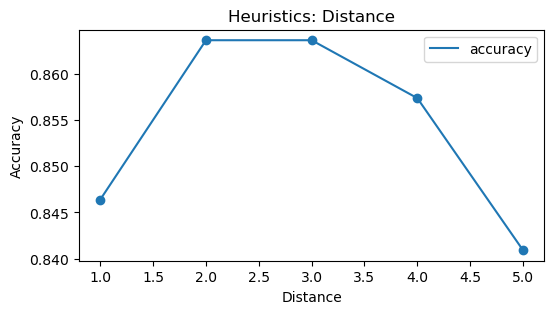

In [15]:
metrics=[1,2,3,4,5]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

---

## Euc Distance Direct

In [36]:
name='euc_dist_direct'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 7.229268524669003
Mean: 9.432759517321935
Max: 383.95745649553635
STD: 21.62228457747726


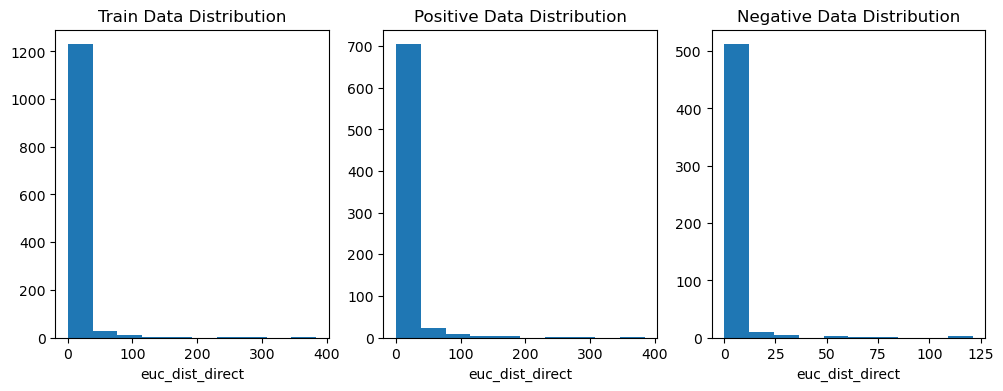

In [37]:
## almost all positive cases have larger distances
## most negative cases have smaller distances, with a few having large distances
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

----

## Area

In [39]:
name='max_area'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.021549688741558718
Median: 0.4998431469394625
Mean: 0.46552481622684233
Max: 0.9999999999999998
STD: 0.17087595930122415


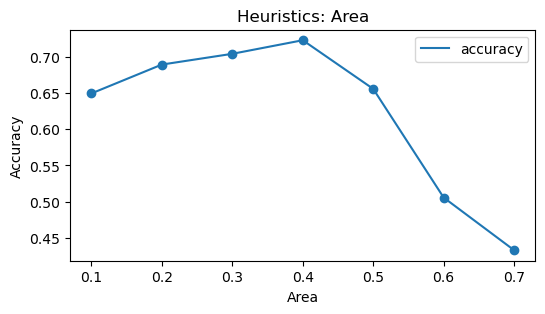

In [40]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

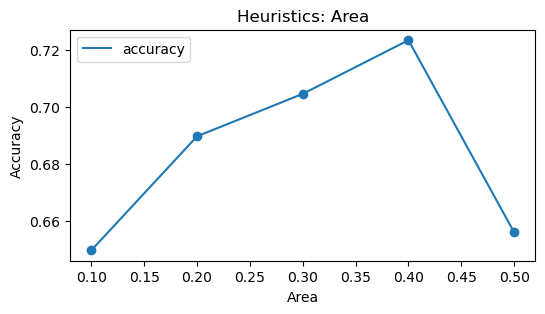

In [21]:
metrics=[0.1,0.2,0.3,0.4,0.5]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

## Area Direct

In [41]:
name='max_area_direct'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.41229250073530654
Mean: 0.37316343483336706
Max: 0.9405696371971761
STD: 0.21557675675605242


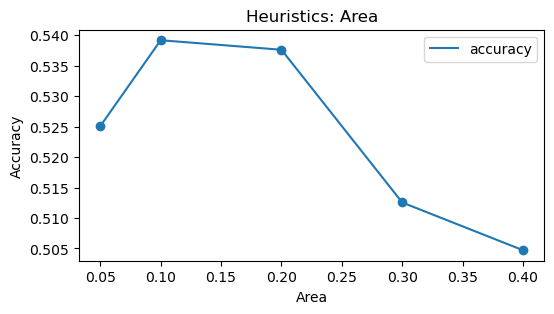

In [48]:
metrics=[0.05,0.1,0.2,0.3,0.4]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area_direct'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

----

## Appendix

spatial data intergration
- join task
- union task

todos:
- reduce the join task data points (~1200) -> to speed up the process
- need more heuristics for each task
- data responsiveness

heuristics

join task:
1) minimum angle
2) drop all interior points, connect start and end, threshold on angle
3) minimum distance
4) drop all interior points, connect start and end, threshold on distance.